# GRIPMAY2021 @ The Spark Foundation
## Task #6 : Prediction using Decision Tree Algorithm
### Objective : The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 
### Author: Ruchit Dobariya

### Importing libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import plot_tree

In [65]:
data=pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [16]:
data.shape

(150, 6)

In [67]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [68]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Id column is not required so we will drop it or delete it.

In [69]:
data.drop(['Id'],axis=1, inplace=True)

In [70]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualizing the data as per the chart shown below

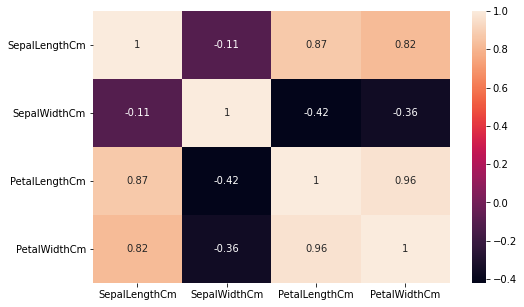

In [71]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,)
plt.show()

In [72]:
data['Species']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Pair plot graph

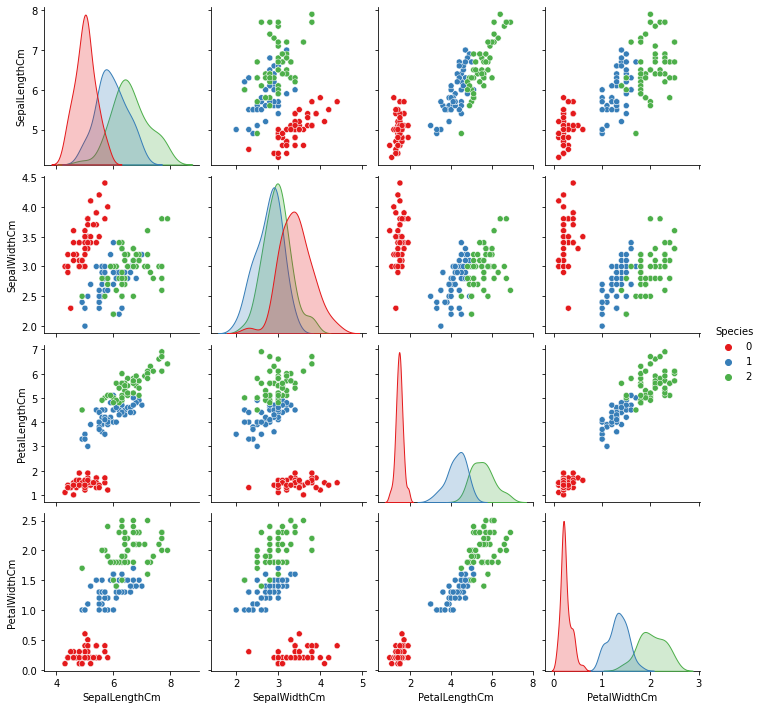

In [74]:
sns.pairplot(data,hue='Species',palette='Set1')
plt.show()

### From above graph we can infer that the Iris-setosa cluster is slightly different than the Iris-versicolor and Iris-verginica

### Dividing dependent variable and indepedent variable differently.

In [75]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]

In [76]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


## Training the model

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) 
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)
print("Training has been completed.")

Training has been completed.


## Prediction and comparision

In [79]:
y_pred = classifier.predict(X_test)

#### Making the confusion Matrix

In [80]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64)

#### Making Classification Report

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### Finding accuracy score

In [82]:
accuracy_score(y_test,y_pred)

0.9777777777777777

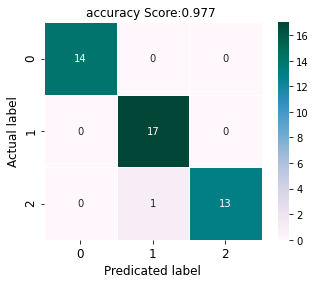

In [83]:
accuracy_score(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',linewidths=0.5,square=True,cmap="PuBuGn")
plt.title("accuracy Score:0.977 ",fontsize=12)
plt.xlabel("Predicated label",fontsize=12)
plt.ylabel("Actual label",fontsize=12)
plt.tick_params(labelsize=12)
plt.show()

#### Around 98% of the model is accurate

### Printing text visual of decision tree

In [84]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= 0.75
|   |--- class: 0
|--- feature_3 >  0.75
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.60
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.60
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



## The Decision Tree

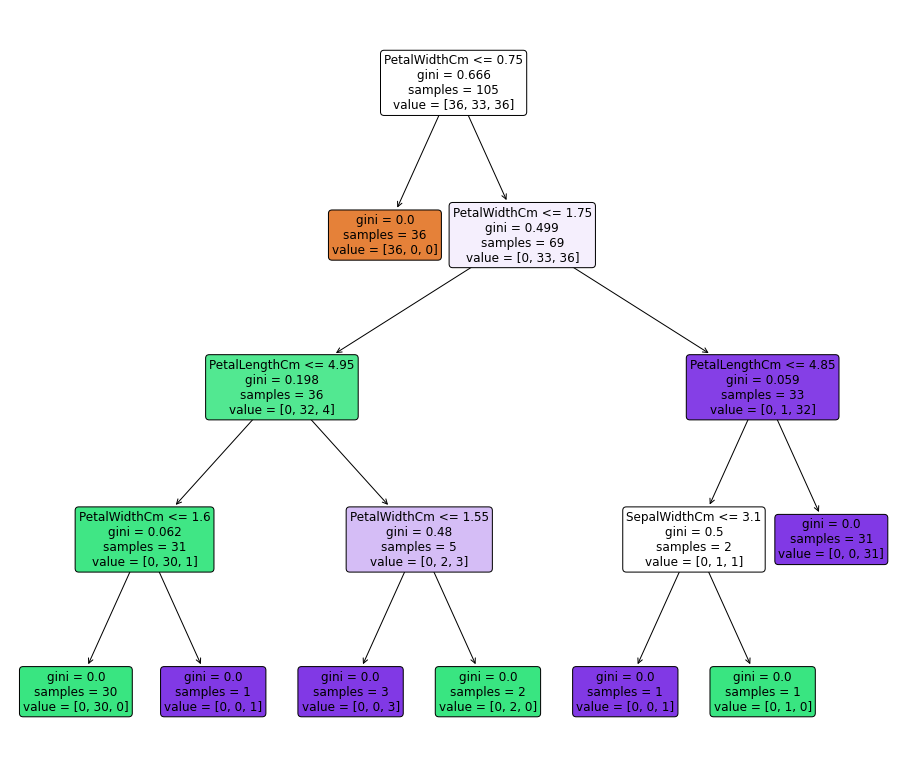

In [85]:
plt.figure(figsize=(16,14))
dtree= tree.plot_tree(classifier, feature_names = x.columns , fontsize = 12 , filled = True, rounded=True)

## Prediction on the our own randomly created data.

In [86]:
new_data =  pd.DataFrame({'SepalLengthCm':[3.5,2.8,4.7,2.8,8.2],
                         'SepalWidthCm':[3.3,9.1,1.4,7.3,3.1],
                         'PetalLengthCm':[5.2,8.3,8.4,4.3,7.2],
                         'PetalWidthCm':[0.8,0.7,0.4,0.6,0.9]})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.5,3.3,5.2,0.8
1,2.8,9.1,8.3,0.7
2,4.7,1.4,8.4,0.4
3,2.8,7.3,4.3,0.6
4,8.2,3.1,7.2,0.9


In [87]:
new_predict = classifier.predict(new_data)

In [88]:
new_data['Predicted Species'] = new_predict
new_data['Predicted Species'] = new_data['Predicted Species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted Species
0,3.5,3.3,5.2,0.8,Iris-virginica
1,2.8,9.1,8.3,0.7,Iris-setosa
2,4.7,1.4,8.4,0.4,Iris-setosa
3,2.8,7.3,4.3,0.6,Iris-setosa
4,8.2,3.1,7.2,0.9,Iris-virginica


### Hence the prediction table of randomly created data is displayed.
### From this we can conclude that the decision algorithm tree is succesfully created , visualized and prediction is correct near to approximately 97%.